In [1]:
# Setup the environment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from utils import MealyMachine

# if using a Jupyter notebook, include:
%matplotlib inline

In [2]:
tls_df = pd.read_table('./merge_df.tab')
# tls_df.head()

In [3]:
_by = ["Config_id"]
for _col in tls_df.filter(regex='^Flag_').columns:  _by.append(_col)
for _col in ['Origin','Input','Output','Destination']: _by.append(_col)

In [4]:
result = tls_df.groupby(_by, as_index=False).agg( {'Duration':['mean','std']})
result.columns = ['%s%s' % (a, '_%s' % b if b else '') for a, b in result.columns]

result=result.dropna(axis=0)

In [5]:
flags = []
for _col in tls_df.filter(regex='^Flag_').columns:  flags.append(_col)

output = ["Duration_mean", "Duration_std"]

X = pd.concat([pd.get_dummies(result["Output"],prefix="Out"),result[flags]],axis=1)
y = result["Duration_std"]

from sklearn.model_selection import train_test_split

test_size=0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()  

In [7]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = reg.predict(X_test)

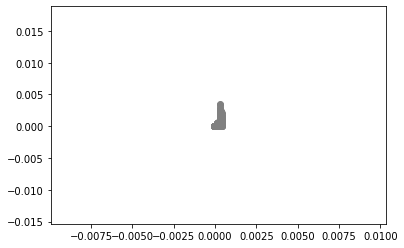

In [14]:
plt.scatter(y_pred, y_test,  color='gray')
plt.plot(y_pred, y_test, color='red', linewidth=2)
plt.show()